<a href="https://colab.research.google.com/github/mesbasajib/Data2/blob/main/Covid19_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd  #data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

##Data Collection
Use nytimes github repository as a data source to collect the covid 19 data in real time
 and ingest it into colab notebook for data anlysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.shape

(39430, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
# rename columns name
df = df.rename(columns={'date': 'DATE'})

In [ ]:
df.head()
#df.tail()
#df

,DATE,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
# set Date is an index
#element from the start of the list
df.set_index('DATE').head()

,state,fips,cases,deaths
DATE,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0


##Data Wrangling and EDA (Exploratory Data Analysis)
Analyzing New York state data for Covid 19

In [ ]:
# creating the var ny_df
# which will contain rows only if they match
# the state column having 'New York'
ny_df = df[df['state']=='New York']

In [ ]:
# preview of the data 
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.head()

,DATE,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
# the shape is 683 rows and 5 columns
# columns are date, state, fips, cases, deaths
ny_df.shape

(716, 5)

In [ ]:
# the tail of the data is shown
# showing us the date
# the state of new york being the focus
# the fips
# cases
# deaths
ny_df.tail()

,DATE,state,fips,cases,deaths
39184,2022-02-10,New York,36,4857125,65665
39240,2022-02-11,New York,36,4861945,65785
39296,2022-02-12,New York,36,4864803,65785
39352,2022-02-13,New York,36,4870144,65912
39408,2022-02-14,New York,36,4872741,65943


In [ ]:
#first death in NY
# first_ny_death dataframe shows us where deaths are not equal to 0
# so every row here will contain of at least 1 death
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,DATE,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [ ]:
# total  hight number of cases
ny_df['cases'].max()

4872741

In [ ]:
# find total positive and death
ny_df[['deaths','cases']].sum()

deaths      30060489
cases     1105003270
dtype: int64

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previous_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head()

,DATE,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11


In [ ]:
# count total cases
ny_df['new_cases'].sum()

4872741

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['DATE']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

In [ ]:
# passing the .Figure function from plotly 

fig = go.Figure()

# assigning the x-axis and y-axis for deaths in the ny dataframe
# this will be the graph in the 'back' showing the cumulative deaths
# in blue
fig.add_trace(go.Bar( x = ny_df['DATE'],
                      y = ny_df['deaths'],
                     name = 'deaths'
                     ))

# assigning the x-axis and the y-axis for new cases of infection, from the 
# previous day
# this will be the graph in the 'front' showing the new cases

fig.add_trace(go.Bar(x = ny_df['DATE'],
                     y = ny_df['new_cases'],
                     name = 'new cases'
                     ))

# the title is named here, and the size of the chart is set to 1920x1080
# font size is set to 30
fig.update_layout(title = "Deaths to New Cases",
               barmode = "overlay",
               title_font_size = 30,
               width = 1920,
               height = 1080)
# X axis is updated to Date
fig.update_xaxes(
                title_text = 'Date'
)
# Y axis is updated to 'Count of each'
fig.update_yaxes(
                title_text = 'Count'
)
# How does every new case of covid impact the death rate
# we see that there is a lag in death with when we see an amount of infections
# we can also see the timeline when the vaccine was introduced and the death
# rate was minimized 

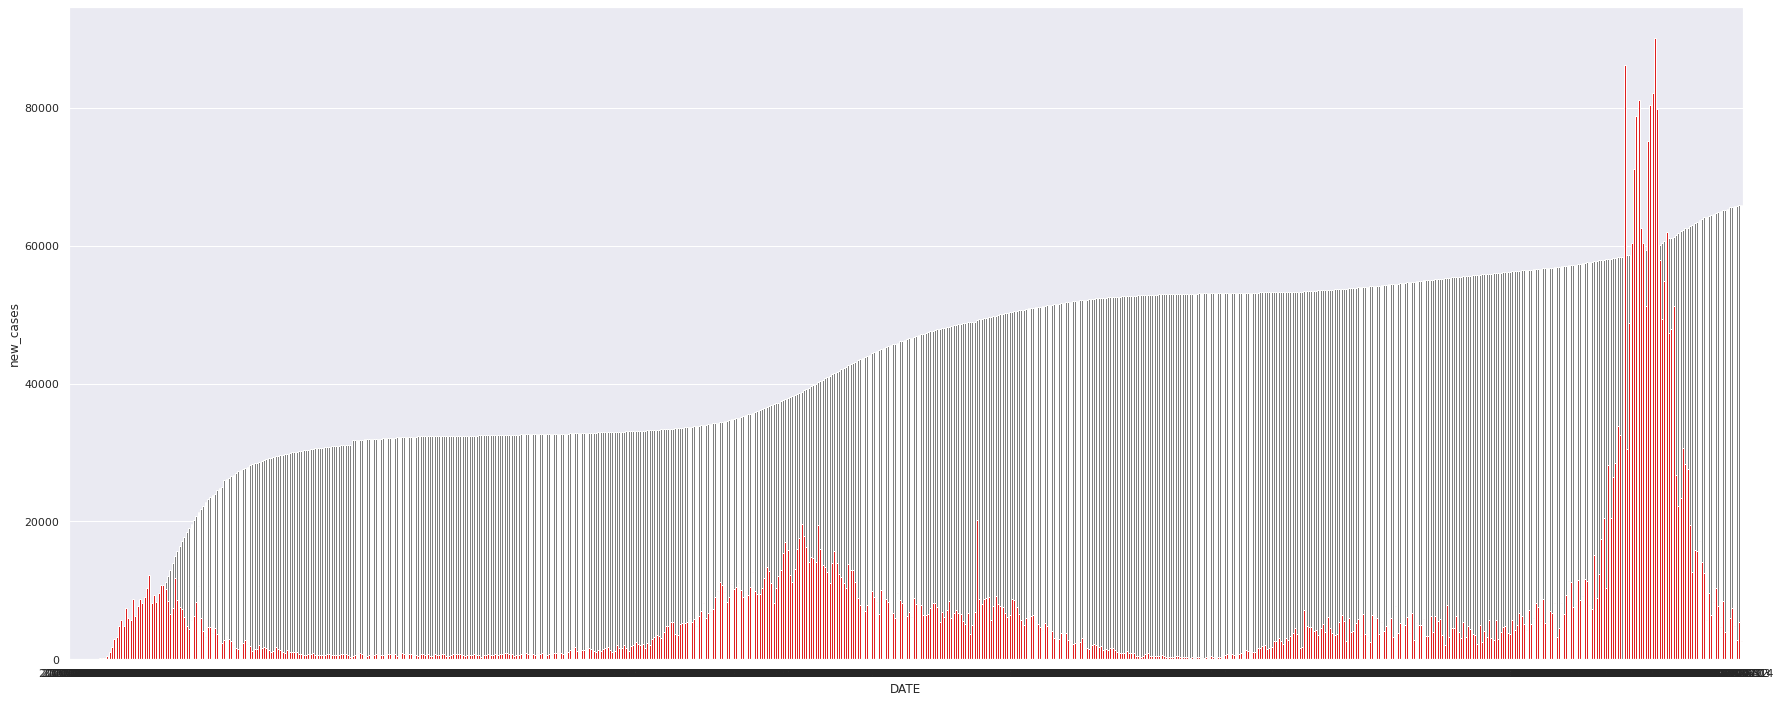

In [ ]:
# creating a subplot, and assigning the figure size
fig, ax = plt.subplots(figsize=(30,12))

# creating stacked bar charts
# the deaths bar chart will be marked in grey to show the total deaths so far
# the red bar is the second bar chart to overlap the grey bar to show the
# disparty between new cases
ax = sns.barplot(x = 'DATE', y = 'deaths', data=ny_df, color ='grey')
ax = sns.barplot(x = 'DATE', y = 'new_cases', data=ny_df, color = 'red')


plt.show()

In [ ]:
fig = px.area(ny_df,x='DATE', y='cases', facet_col="state", facet_col_wrap=2)
fig.show()

In [ ]:
fig = px.area(ny_df,x='DATE', y='deaths', facet_col="state", facet_col_wrap=2)
fig.show()

In [ ]:
# time series chart
# height might be the y-axis and we are just plotting the new cases in new york

#plt.figure(figsize=(15,7))
#plt.bar(x=ny_dates, height=ny_new_cases, color='red')
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
# setting the width variable with anchos to 0.5

#anchos = 0.5

# passing the .Figure function from plotly 

fig = go.Figure()

# assigning the x-axis and the y-axis for 'Total Ballot Count (Estimated)'
# this will be the graph in the 'front' showing the estimated ballot count
# an offset is introduced here, to make it more apparent
fig.add_trace(go.Bar(x = ny_df['DATE'],
                     y = ny_df['new_cases'],
                     offset = 0.0005,
                     #width = 0.5,
                     name = 'new cases'
                     ))

# the title is named here, and the size of the chart is set to 1280x1024
# font size is set to 30
fig.update_layout(title = "New Cases",
               barmode = "overlay",
               title_font_size = 30,
               width = 1280,
               height = 1024)
# X axis is updated to State
fig.update_xaxes(
                title_text = 'Date'
)
# Y axis is updated to 'Voter Eligible Population to Ballots Cast'
fig.update_yaxes(
                title_text = 'Count of new cases'
)
# How does the eligible population compare to the ballot count of each state?
# Thus, we can see which state had the greatest turnout rate as well. 

##Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['DATE'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

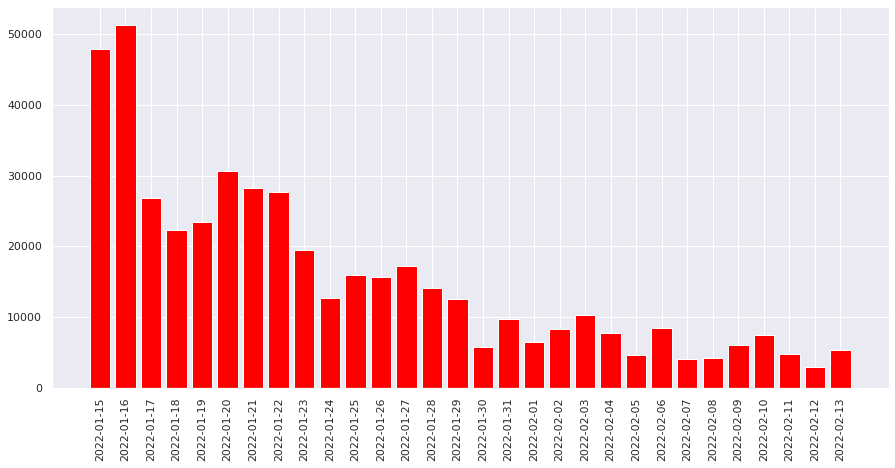

In [ ]:
#Creates a graph of cases in NY from 12/12-1/11
#Specifies the width as 15 and heigt as 7 inches
#Rotates x-axis labels by 90 degrees
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# plt.figure(figsize = (15, 7))
#fig = px.bar(x = ny_dates_30, y = ny_new_cases_30,
 #           labels = dict(x = "NY New Cases from 12/14/2021 through 1/11/2022,",
  #                         y = "Amount of New Cases"))
#fig.update_xaxes(range=["2021-12-14", "2022-01-11"])
#fig.update_yaxes(range=[0, 90000])

#fig.show()

# Number of new cases in NY from Dec 14 - Jan 11

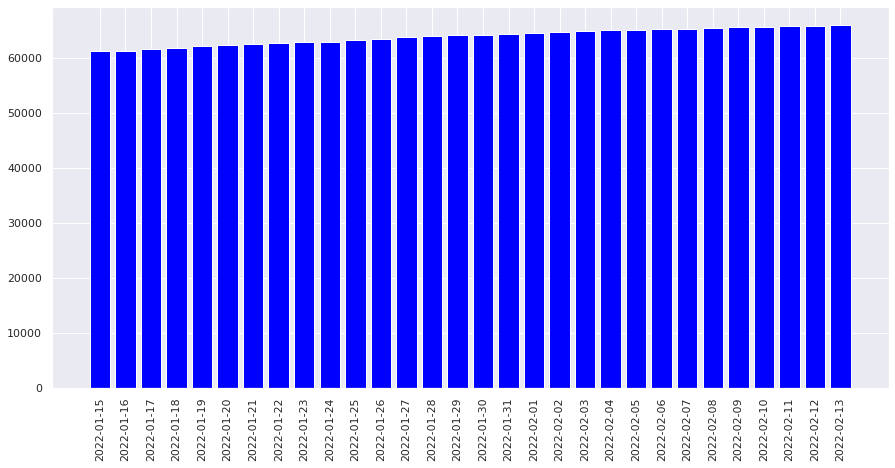

In [ ]:
#Creates a graph of deaths in NY from 12/12-1/11
#Specifies the width as 15 and height as 7 inches
#Rotates x-axis labels by 90 degrees
# change the scale of the y axis to exaggerate the increases in deaths
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# plt.figure(figsize = (15, 7))
# this graph is showing NY days in a 30 day period in a cumulative format
# please note, the y axis is not starting from 0 and the range is adjusted
# to visually exaggerate the increase for the viewer
# but the actual change in terms of percentage is smaller than you may perceive

#fig = px.bar(x = ny_dates_30, y = ny_deaths_30,
#             labels = dict(x = "NY Deaths from 12/12/2021 through 1/12/2022,",
 #                          y = "Cumulative Deaths"))
#fig.update_yaxes(range=[55000, 62000])
#fig.update_xaxes(range=["2021-12-14", "2022-01-12"])

#fig.show()

##Comparing Covid 19 data with different states
Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [ ]:
#States the states that are used for comparison
states = ['New York', 'California','Florida', 'Texas','Arizona']

In [ ]:
# create the time series plot
'''
sns.lineplot(x = "Date", y = "Col_1", data = df)
sns.lineplot(x = "Date", y = "Col_2", data = df)
plt.ylabel("Col_1 and Col_2")
plt.xticks(rotation = 25)
'''

'\nsns.lineplot(x = "Date", y = "Col_1", data = df)\nsns.lineplot(x = "Date", y = "Col_2", data = df)\nplt.ylabel("Col_1 and Col_2")\nplt.xticks(rotation = 25)\n'

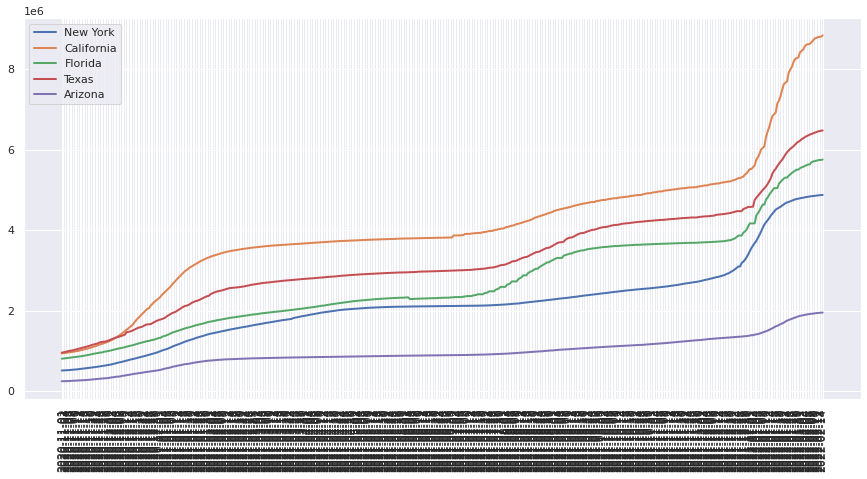

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['DATE']>='2020-11-01')]
  plt.plot(df_st['DATE'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

#Change the start date from November to July
#Change the graph

In [ ]:
df_july = df[df.state.isin(states) & (df['DATE']>='2020-07-01')]

In [ ]:
df_july

,DATE,state,fips,cases,deaths
6616,2020-07-01,Arizona,4,84152,1726
6618,2020-07-01,California,6,239764,6168
6623,2020-07-01,Florida,12,158989,3549
6647,2020-07-01,New York,36,398770,31791
6660,2020-07-01,Texas,48,174826,2518
...,...,...,...,...,...
39377,2022-02-14,Arizona,4,1953168,27181
39379,2022-02-14,California,6,8835374,83033
39384,2022-02-14,Florida,12,5751104,67910
39408,2022-02-14,New York,36,4872741,65943


In [ ]:
# Date is from july 2020 to Jan 2022
# Comparing 5 states 
# Arizona has less cases than California and Texas, Arizona has less people living there
# Even though California has more people than new york
# the slope is similar in New York with California and Texas
# 

# 
fig = px.area(df_july,
              x = 'DATE',
              y = 'cases',
              facet_col="state",
              facet_col_wrap=3)
fig.show()

deaths      30060489
cases     1105003270
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



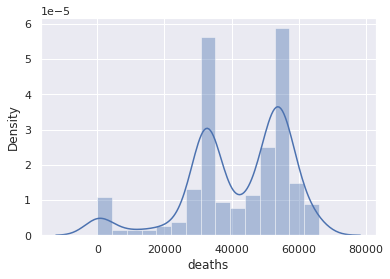

In [ ]:
sns.distplot(ny_df['deaths'])